In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [90]:
data = pd.read_csv('../data/ml_df.csv').drop(columns=['Unnamed: 0','away_team_api_id_HOME','home_team_api_id_HOME'])

In [91]:
data

,defenceTeamWidth_HOME,defenceTeamWidth_AWAY,defencePressure_HOME,defencePressure_AWAY,defenceAggression_HOME,defenceAggression_AWAY,chanceCreationShooting_HOME,chanceCreationShooting_AWAY,chanceCreationPassing_HOME,chanceCreationPassing_AWAY,chanceCreationCrossing_HOME,chanceCreationCrossing_AWAY,buildUpPlaySpeed_HOME,buildUpPlaySpeed_AWAY,buildUpPlayPassing_HOME,buildUpPlayPassing_AWAY,buildUpPlayDribbling_HOME,buildUpPlayDribbling_AWAY,YEAR,WHH_HOME,WHD_HOME,WHA_HOME,VCH_HOME,VCD_HOME,VCA_HOME,SJH_HOME,SJD_HOME,SJA_HOME,PSH_HOME,PSD_HOME,PSA_HOME,LBH_HOME,LBD_HOME,LBA_HOME,IWH_HOME,IWD_HOME,IWA_HOME,GBH_HOME,GBD_HOME,GBA_HOME,BWH_HOME,BWD_HOME,BWA_HOME,BSH_HOME,BSD_HOME,BSA_HOME,B365H_HOME,B365D_HOME,B365A_HOME,y,defenceTeamWidthClass_HOME_Normal,defenceTeamWidthClass_HOME_Wide,defenceTeamWidthClass_AWAY_Normal,defenceTeamWidthClass_AWAY_Wide,defencePressureClass_HOME_High,defencePressureClass_HOME_Medium,defencePressureClass_AWAY_High,defencePressureClass_AWAY_Medium,defenceDefenderLineClass_HOME_Offside Trap,defenceDefenderLineClass_AWAY_Offside Trap,defenceAggressionClass_HOME_Double,defenceAggressionClass_HOME_Press,defenceAggressionClass_AWAY_Double,defenceAggressionClass_AWAY_Press,chanceCreationShootingClass_HOME_Lots,chanceCreationShootingClass_HOME_Normal,chanceCreationShootingClass_AWAY_Lots,chanceCreationShootingClass_AWAY_Normal,chanceCreationPositioningClass_HOME_Organised,chanceCreationPositioningClass_AWAY_Organised,chanceCreationPassingClass_HOME_Risky,chanceCreationPassingClass_HOME_Safe,chanceCreationPassingClass_AWAY_Risky,chanceCreationPassingClass_AWAY_Safe,chanceCreationCrossingClass_HOME_Lots,chanceCreationCrossingClass_HOME_Normal,chanceCreationCrossingClass_AWAY_Lots,chanceCreationCrossingClass_AWAY_Normal,buildUpPlaySpeedClass_HOME_Fast,buildUpPlaySpeedClass_HOME_Slow,buildUpPlaySpeedClass_AWAY_Fast,buildUpPlaySpeedClass_AWAY_Slow,buildUpPlayPositioningClass_HOME_Organised,buildUpPlayPositioningClass_AWAY_Organised,buildUpPlayPassingClass_HOME_Mixed,buildUpPlayPassingClass_HOME_Short,buildUpPlayPassingClass_AWAY_Mixed,buildUpPlayPassingClass_AWAY_Short,buildUpPlayDribblingClass_HOME_Lots,buildUpPlayDribblingClass_HOME_Normal,buildUpPlayDribblingClass_AWAY_Lots,buildUpPlayDribblingClass_AWAY_Normal
0,70,70,70,60,50,70,60,45,70,45,50,50,50,35,35,40,NaN,NaN,2010-01-01,1.70,3.30,5.0,1.67,3.6,4.5,1.75,3.6,4.75,NaN,NaN,NaN,1.66,3.40,4.33,1.75,3.3,3.8,1.72,3.40,4.5,1.75,3.4,4.25,1.73,3.4,4.2,1.73,3.60,4.75,1.0,0,1,0,1,1,0,0,1,0,0,0,1,1,0,0,1,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0
1,70,50,70,50,50,50,60,50,70,50,50,50,50,50,35,50,NaN,NaN,2010-01-01,1.22,5.50,11.0,1.20,5.5,12.0,1.22,6.0,13.00,NaN,NaN,NaN,1.22,5.00,10.00,1.20,5.0,10.0,1.25,5.50,8.5,1.20,5.6,11.00,1.22,5.0,11.0,1.22,5.75,13.00,0.0,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0
2,70,60,70,60,50,70,60,50,70,50,50,40,50,65,35,60,NaN,NaN,2010-01-01,1.22,5.50,10.0,1.22,5.0,13.0,1.22,6.5,12.00,NaN,NaN,NaN,1.20,5.00,11.00,1.22,4.8,9.5,1.22,5.50,10.0,1.20,5.6,11.00,1.20,5.5,11.0,1.25,5.25,13.00,1.0,0,1,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0
3,70,70,70,70,50,65,60,60,70,50,50,35,50,45,35,45,NaN,NaN,2010-01-01,1.33,4.33,8.5,1.40,4.0,7.5,1.36,4.5,8.50,NaN,NaN,NaN,1.33,4.33,7.00,1.40,3.9,6.0,1.38,4.25,7.0,1.35,4.4,7.50,1.40,4.0,7.5,1.40,4.50,8.00,1.0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0
4,70,70,70,70,50,70,60,55,70,40,50,45,50,45,35,60,NaN,NaN,2010-01-01,1.29,4.50,11.0,1.25,5.5,12.0,1.27,5.5,11.00,NaN,NaN,NaN,1.25,4.50,10.00,1.25,4.5,9.0,1.25,5.00,10.0,1.25,4.9,10.00,1.25,5.0,9.0,1.25,5.50,12.00,1.0,0,1,0,1,1,0,1,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [92]:
listie =[]
for i in data['y']:
    if i == 1:
        stat = 'win'
    elif i == 0:
        stat = 'loss'
    else:
        stat = 'draw'
    listie.append(stat)

data['y'] = listie
        

In [93]:
data

,defenceTeamWidth_HOME,defenceTeamWidth_AWAY,defencePressure_HOME,defencePressure_AWAY,defenceAggression_HOME,defenceAggression_AWAY,chanceCreationShooting_HOME,chanceCreationShooting_AWAY,chanceCreationPassing_HOME,chanceCreationPassing_AWAY,chanceCreationCrossing_HOME,chanceCreationCrossing_AWAY,buildUpPlaySpeed_HOME,buildUpPlaySpeed_AWAY,buildUpPlayPassing_HOME,buildUpPlayPassing_AWAY,buildUpPlayDribbling_HOME,buildUpPlayDribbling_AWAY,YEAR,WHH_HOME,WHD_HOME,WHA_HOME,VCH_HOME,VCD_HOME,VCA_HOME,SJH_HOME,SJD_HOME,SJA_HOME,PSH_HOME,PSD_HOME,PSA_HOME,LBH_HOME,LBD_HOME,LBA_HOME,IWH_HOME,IWD_HOME,IWA_HOME,GBH_HOME,GBD_HOME,GBA_HOME,BWH_HOME,BWD_HOME,BWA_HOME,BSH_HOME,BSD_HOME,BSA_HOME,B365H_HOME,B365D_HOME,B365A_HOME,y,defenceTeamWidthClass_HOME_Normal,defenceTeamWidthClass_HOME_Wide,defenceTeamWidthClass_AWAY_Normal,defenceTeamWidthClass_AWAY_Wide,defencePressureClass_HOME_High,defencePressureClass_HOME_Medium,defencePressureClass_AWAY_High,defencePressureClass_AWAY_Medium,defenceDefenderLineClass_HOME_Offside Trap,defenceDefenderLineClass_AWAY_Offside Trap,defenceAggressionClass_HOME_Double,defenceAggressionClass_HOME_Press,defenceAggressionClass_AWAY_Double,defenceAggressionClass_AWAY_Press,chanceCreationShootingClass_HOME_Lots,chanceCreationShootingClass_HOME_Normal,chanceCreationShootingClass_AWAY_Lots,chanceCreationShootingClass_AWAY_Normal,chanceCreationPositioningClass_HOME_Organised,chanceCreationPositioningClass_AWAY_Organised,chanceCreationPassingClass_HOME_Risky,chanceCreationPassingClass_HOME_Safe,chanceCreationPassingClass_AWAY_Risky,chanceCreationPassingClass_AWAY_Safe,chanceCreationCrossingClass_HOME_Lots,chanceCreationCrossingClass_HOME_Normal,chanceCreationCrossingClass_AWAY_Lots,chanceCreationCrossingClass_AWAY_Normal,buildUpPlaySpeedClass_HOME_Fast,buildUpPlaySpeedClass_HOME_Slow,buildUpPlaySpeedClass_AWAY_Fast,buildUpPlaySpeedClass_AWAY_Slow,buildUpPlayPositioningClass_HOME_Organised,buildUpPlayPositioningClass_AWAY_Organised,buildUpPlayPassingClass_HOME_Mixed,buildUpPlayPassingClass_HOME_Short,buildUpPlayPassingClass_AWAY_Mixed,buildUpPlayPassingClass_AWAY_Short,buildUpPlayDribblingClass_HOME_Lots,buildUpPlayDribblingClass_HOME_Normal,buildUpPlayDribblingClass_AWAY_Lots,buildUpPlayDribblingClass_AWAY_Normal
0,70,70,70,60,50,70,60,45,70,45,50,50,50,35,35,40,NaN,NaN,2010-01-01,1.70,3.30,5.0,1.67,3.6,4.5,1.75,3.6,4.75,NaN,NaN,NaN,1.66,3.40,4.33,1.75,3.3,3.8,1.72,3.40,4.5,1.75,3.4,4.25,1.73,3.4,4.2,1.73,3.60,4.75,win,0,1,0,1,1,0,0,1,0,0,0,1,1,0,0,1,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0
1,70,50,70,50,50,50,60,50,70,50,50,50,50,50,35,50,NaN,NaN,2010-01-01,1.22,5.50,11.0,1.20,5.5,12.0,1.22,6.0,13.00,NaN,NaN,NaN,1.22,5.00,10.00,1.20,5.0,10.0,1.25,5.50,8.5,1.20,5.6,11.00,1.22,5.0,11.0,1.22,5.75,13.00,loss,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0
2,70,60,70,60,50,70,60,50,70,50,50,40,50,65,35,60,NaN,NaN,2010-01-01,1.22,5.50,10.0,1.22,5.0,13.0,1.22,6.5,12.00,NaN,NaN,NaN,1.20,5.00,11.00,1.22,4.8,9.5,1.22,5.50,10.0,1.20,5.6,11.00,1.20,5.5,11.0,1.25,5.25,13.00,win,0,1,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0
3,70,70,70,70,50,65,60,60,70,50,50,35,50,45,35,45,NaN,NaN,2010-01-01,1.33,4.33,8.5,1.40,4.0,7.5,1.36,4.5,8.50,NaN,NaN,NaN,1.33,4.33,7.00,1.40,3.9,6.0,1.38,4.25,7.0,1.35,4.4,7.50,1.40,4.0,7.5,1.40,4.50,8.00,win,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0
4,70,70,70,70,50,70,60,55,70,40,50,45,50,45,35,60,NaN,NaN,2010-01-01,1.29,4.50,11.0,1.25,5.5,12.0,1.27,5.5,11.00,NaN,NaN,NaN,1.25,4.50,10.00,1.25,4.5,9.0,1.25,5.00,10.0,1.25,4.9,10.00,1.25,5.0,9.0,1.25,5.50,12.00,win,0,1,0,1,1,0,1,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [94]:
# Create a random forest classifier
data.fillna(data.mean(), inplace=True)

In [95]:
rf = RandomForestClassifier(n_estimators=200,random_state=33,max_depth=7,min_samples_split=7)

In [96]:
data = data.drop('YEAR',axis=1)

In [97]:
# Assign X (data) and y (target)
X = data.drop("y", axis=1)
y = data["y"]
print(X.shape, y.shape)

(18243, 90) (18243,)


Split our data into training and testing

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [99]:
rf = rf.fit(X_train, y_train)

In [138]:
rf.score(X_test, y_test)

0.5253233939925455

In [101]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf.feature_importances_
importances

array([0.00649596, 0.00672631, 0.00748739, 0.00822494, 0.00813674,
       0.00588233, 0.00647531, 0.00743154, 0.00769461, 0.00701178,
       0.00785734, 0.00841057, 0.00721141, 0.00813097, 0.00827652,
       0.00635243, 0.00535354, 0.00565619, 0.0609992 , 0.01377768,
       0.05079218, 0.06107011, 0.01398282, 0.0498523 , 0.02688412,
       0.00499887, 0.01940481, 0.0226727 , 0.00806968, 0.01745115,
       0.04037046, 0.01030378, 0.04935981, 0.0365353 , 0.01119051,
       0.04529278, 0.01086317, 0.00534304, 0.00918202, 0.06071927,
       0.01183373, 0.04820388, 0.01096908, 0.0051205 , 0.00999873,
       0.06471485, 0.01494488, 0.05066842, 0.00040956, 0.0003114 ,
       0.00032475, 0.00032709, 0.000714  , 0.00057077, 0.00099705,
       0.00069421, 0.0007714 , 0.00064218, 0.0004277 , 0.00053805,
       0.00039944, 0.00060209, 0.00053389, 0.00055648, 0.00076282,
       0.00071008, 0.00116338, 0.00075553, 0.00070231, 0.00046386,
       0.00058121, 0.00062469, 0.00046958, 0.00046722, 0.00070

In [102]:
# We can sort the features by their importance
featureweight = sorted(zip(rf.feature_importances_, X.columns), reverse=True)

# Model with team name dummies

In [36]:
data = pd.read_csv('../data/dummied_teamid_ml_df.csv').drop(columns=['Unnamed: 0'])

In [37]:
data

,defenceTeamWidth_HOME,defenceTeamWidth_AWAY,defencePressure_HOME,defencePressure_AWAY,defenceAggression_HOME,defenceAggression_AWAY,chanceCreationShooting_HOME,chanceCreationShooting_AWAY,chanceCreationPassing_HOME,chanceCreationPassing_AWAY,chanceCreationCrossing_HOME,chanceCreationCrossing_AWAY,buildUpPlaySpeed_HOME,buildUpPlaySpeed_AWAY,buildUpPlayPassing_HOME,buildUpPlayPassing_AWAY,buildUpPlayDribbling_HOME,buildUpPlayDribbling_AWAY,YEAR,WHH_HOME,WHD_HOME,WHA_HOME,VCH_HOME,VCD_HOME,VCA_HOME,SJH_HOME,SJD_HOME,SJA_HOME,PSH_HOME,PSD_HOME,PSA_HOME,LBH_HOME,LBD_HOME,LBA_HOME,IWH_HOME,IWD_HOME,IWA_HOME,GBH_HOME,GBD_HOME,GBA_HOME,BWH_HOME,BWD_HOME,BWA_HOME,BSH_HOME,BSD_HOME,BSA_HOME,B365H_HOME,B365D_HOME,B365A_HOME,y,defenceTeamWidthClass_HOME_Normal,defenceTeamWidthClass_HOME_Wide,defenceTeamWidthClass_AWAY_Normal,defenceTeamWidthClass_AWAY_Wide,defencePressureClass_HOME_High,defencePressureClass_HOME_Medium,defencePressureClass_AWAY_High,defencePressureClass_AWAY_Medium,defenceDefenderLineClass_HOME_Offside Trap,defenceDefenderLineClass_AWAY_Offside Trap,defenceAggressionClass_HOME_Double,defenceAggressionClass_HOME_Press,defenceAggressionClass_AWAY_Double,defenceAggressionClass_AWAY_Press,chanceCreationShootingClass_HOME_Lots,chanceCreationShootingClass_HOME_Normal,chanceCreationShootingClass_AWAY_Lots,chanceCreationShootingClass_AWAY_Normal,chanceCreationPositioningClass_HOME_Organised,chanceCreationPositioningClass_AWAY_Organised,chanceCreationPassingClass_HOME_Risky,chanceCreationPassingClass_HOME_Safe,chanceCreationPassingClass_AWAY_Risky,chanceCreationPassingClass_AWAY_Safe,chanceCreationCrossingClass_HOME_Lots,chanceCreationCrossingClass_HOME_Normal,chanceCreationCrossingClass_AWAY_Lots,chanceCreationCrossingClass_AWAY_Normal,buildUpPlaySpeedClass_HOME_Fast,buildUpPlaySpeedClass_HOME_Slow,buildUpPlaySpeedClass_AWAY_Fast,buildUpPlaySpeedClass_AWAY_Slow,buildUpPlayPositioningClass_HOME_Organised,buildUpPlayPositioningClass_AWAY_Organised,buildUpPlayPassingClass_HOME_Mixed,buildUpPlayPassingClass_HOME_Short,buildUpPlayPassingClass_AWAY_Mixed,buildUpPlayPassingClass_AWAY_Short,buildUpPlayDribblingClass_HOME_Lots,buildUpPlayDribblingClass_HOME_Normal,buildUpPlayDribblingClass_AWAY_Lots,buildUpPlayDribblingClass_AWAY_Normal,away_team_api_id_HOME_1773,away_team_api_id_HOME_1957,away_team_api_id_HOME_2033,away_team_api_id_HOME_2182,away_team_api_id_HOME_2183,away_team_api_id_HOME_2186,away_team_api_id_HOME_4087,away_team_api_id_HOME_4170,away_team_api_id_HOME_6269,away_team_api_id_HOME_6351,away_team_api_id_HOME_6391,away_team_api_id_HOME_6403,away_team_api_id_HOME_6413,away_team_api_id_HOME_6421,away_team_api_id_HOME_6433,away_team_api_id_HOME_6493,away_team_api_id_HOME_6547,away_team_api_id_HOME_6631,away_team_api_id_HOME_7730,away_team_api_id_HOME_7788,away_team_api_id_HOME_7794,away_team_api_id_HOME_7819,away_team_api_id_HOME_7841,away_team_api_id_HOME_7842,away_team_api_id_HOME_7844,away_team_api_id_HOME_7869,away_team_api_id_HOME_7878,away_team_api_id_HOME_7943,away_team_api_id_HOME_7955,away_team_api_id_HOME_8019,away_team_api_id_HOME_8020,away_team_api_id_HOME_8021,away_team_api_id_HOME_8023,away_team_api_id_HOME_8024,away_team_api_id_HOME_8025,away_team_api_id_HOME_8027,away_team_api_id_HOME_8028,away_team_api_id_HOME_8030,away_team_api_id_HOME_8031,away_team_api_id_HOME_8033,away_team_api_id_HOME_8066,away_team_api_id_HOME_8121,away_team_api_id_HOME_8152,away_team_api_id_HOME_8165,away_team_api_id_HOME_8177,away_team_api_id_HOME_8178,away_team_api_id_HOME_8191,away_team_api_id_HOME_8194,away_team_api_id_HOME_8197,away_team_api_id_HOME_8203,away_team_api_id_HOME_8226,away_team_api_id_HOME_8234,away_team_api_id_HOME_8242,away_team_api_id_HOME_8244,away_team_api_id_HOME_8245,away_team_api_id_HOME_8262,away_team_api_id_HOME_8277,away_team_api_id_HOME_8284,away_team_api_id_HOME_8302,away_team_api_id_HOME_8305,away_team_api_id_HOME_8306,away_team_api_id_HOME_8315,away_team_api_id_HOME_8322,away_team_api_id_HOME_8342,away_t

In [38]:
listie =[]
for i in data['y']:
    if i == 1:
        stat = 'win'
    elif i == 0:
        stat = 'loss'
    else:
        stat = 'draw'
    listie.append(stat)

data['y'] = listie
        

In [39]:
# Create a random forest classifier
data.fillna(data.mean(), inplace=True)

rf = RandomForestClassifier(n_estimators=20,random_state=33,max_depth=7,min_samples_split=7)

In [40]:
data = data.drop('YEAR',axis=1)

In [41]:
# Assign X (data) and y (target)
X = data.drop("y", axis=1)
y = data["y"]
print(X.shape, y.shape)

(18243, 646) (18243,)


Split our data into training and testing

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [43]:
rf = rf.fit(X_train, y_train)

In [44]:
print(rf.score(X_train, y_train),'  train score')
print(rf.score(X_test, y_test),'  test score')

0.5242654582663353   train score
0.5283928962946722   test score


In [154]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf.feature_importances_
importances

array([2.11925788e-03, 3.58653423e-03, 4.41525274e-03, 4.43403943e-03,
       3.43503623e-03, 3.87683792e-03, 3.63916698e-03, 3.88181855e-03,
       2.29167314e-03, 3.31111675e-03, 2.53977980e-03, 3.41648571e-03,
       2.55324614e-03, 3.10001148e-03, 3.56438843e-03, 2.36583552e-03,
       2.34246593e-03, 3.01075281e-03, 4.49623551e-02, 1.26527416e-02,
       7.89482707e-02, 2.35973247e-02, 2.83919078e-02, 3.71948801e-02,
       2.01438343e-02, 6.71210381e-03, 3.57011411e-02, 2.08613828e-02,
       1.41089268e-02, 3.16744006e-02, 2.49738710e-02, 1.36457559e-02,
       3.06595331e-02, 9.71585172e-02, 6.87075596e-03, 4.93928940e-02,
       3.18361548e-02, 4.21567282e-03, 2.66873155e-02, 3.51902353e-02,
       1.44086726e-02, 9.25634433e-02, 9.93824768e-03, 4.21582419e-03,
       2.67524862e-03, 3.58974394e-02, 1.08308696e-02, 1.44880933e-02,
       1.14467484e-04, 0.00000000e+00, 8.04390691e-04, 1.02322100e-04,
       2.88061420e-04, 5.40119524e-04, 7.65885058e-04, 6.31877429e-04,
      

In [155]:
# We can sort the features by their importance
sorted(zip(rf.feature_importances_, X.columns), reverse=True)

[(0.09715851720273369, 'IWH_HOME'),
 (0.09256344325086532, 'BWA_HOME'),
 (0.07894827065450588, 'WHA_HOME'),
 (0.04939289404099519, 'IWA_HOME'),
 (0.04496235511672263, 'WHH_HOME'),
 (0.03719488013703218, 'VCA_HOME'),
 (0.03589743938299787, 'B365H_HOME'),
 (0.035701141124572906, 'SJA_HOME'),
 (0.03519023527753148, 'BWH_HOME'),
 (0.03183615483036801, 'GBH_HOME'),
 (0.03167440058474082, 'PSA_HOME'),
 (0.0306595330651515, 'LBA_HOME'),
 (0.02839190784258509, 'VCD_HOME'),
 (0.02668731548169346, 'GBA_HOME'),
 (0.024973870998708007, 'LBH_HOME'),
 (0.023597324729603804, 'VCH_HOME'),
 (0.020861382796168875, 'PSH_HOME'),
 (0.020143834331632297, 'SJH_HOME'),
 (0.014488093282971414, 'B365A_HOME'),
 (0.01440867255396299, 'BWD_HOME'),
 (0.014108926763389712, 'PSD_HOME'),
 (0.01364575588174943, 'LBD_HOME'),
 (0.012652741648377864, 'WHD_HOME'),
 (0.010830869582916847, 'B365D_HOME'),
 (0.009938247683174358, 'BSH_HOME'),
 (0.006870755962434766, 'IWD_HOME'),
 (0.006712103811919445, 'SJD_HOME'),
 (0.0044340

In [75]:
import sklearn

In [192]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

In [193]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, random_state=1)

In [194]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [195]:
# Transform the training and testing data using the X_scaler

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [196]:
from tensorflow.keras.utils import to_categorical

In [197]:
# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [198]:
# first, create a normal neural network with 2 inputs, 6 hidden nodes, and 2 outputs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import InputLayer
model = Sequential()
# model.add(InputLayer(input_shape=(646)))
model.add(Dense(units=90, activation='relu', input_dim=90))
model.add(Dense(units=45, activation='relu'))
model.add(Dense(units=26, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=5, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

In [199]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 90)                8190      
_________________________________________________________________
dense_13 (Dense)             (None, 45)                4095      
_________________________________________________________________
dense_14 (Dense)             (None, 26)                1196      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                270       
_________________________________________________________________
dense_16 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 18        
Total params: 13,824
Trainable params: 13,824
Non-trainable params: 0
__________________________________________________

In [200]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [201]:
# Fit the model to the training data
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=4,
    shuffle=True,
    verbose=2
)

Epoch 1/4
428/428 - 2s - loss: 1.0584 - accuracy: 0.4996
Epoch 2/4
428/428 - 1s - loss: 1.0171 - accuracy: 0.5192
Epoch 3/4
428/428 - 1s - loss: 1.0037 - accuracy: 0.5204
Epoch 4/4
428/428 - 1s - loss: 0.9964 - accuracy: 0.5229


In [202]:
model_loss, model_accuracy = model.evaluate(
    X_train_scaled, y_train_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

428/428 - 1s - loss: 0.9881 - accuracy: 0.5278
Normal Neural Network - Loss: 0.988143801689148, Accuracy: 0.5278468132019043


In [203]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

143/143 - 0s - loss: 0.9988 - accuracy: 0.5231
Normal Neural Network - Loss: 0.9987581372261047, Accuracy: 0.5231308937072754


In [204]:
tot = data['y'].value_counts().agg('sum')

In [144]:
for i in data['y'].value_counts():
    print(i/tot)


0.4594090884174752
0.28690456613495585
0.2536863454475689


In [350]:
data = pd.read_csv('../data/ml_df.csv')

In [342]:
show_df['prediction'] = rf.predict(X_train)

<ipython-input-342-c0248d36ef29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  show_df['prediction'] = rf.predict(X_train)


In [343]:
show_df

,defenceTeamWidth_HOME,defenceTeamWidth_AWAY,defencePressure_HOME,defencePressure_AWAY,defenceAggression_HOME,defenceAggression_AWAY,chanceCreationShooting_HOME,chanceCreationShooting_AWAY,chanceCreationPassing_HOME,chanceCreationPassing_AWAY,chanceCreationCrossing_HOME,chanceCreationCrossing_AWAY,buildUpPlaySpeed_HOME,buildUpPlaySpeed_AWAY,buildUpPlayPassing_HOME,buildUpPlayPassing_AWAY,buildUpPlayDribbling_HOME,buildUpPlayDribbling_AWAY,WHH_HOME,WHD_HOME,WHA_HOME,VCH_HOME,VCD_HOME,VCA_HOME,SJH_HOME,SJD_HOME,SJA_HOME,PSH_HOME,PSD_HOME,PSA_HOME,LBH_HOME,LBD_HOME,LBA_HOME,IWH_HOME,IWD_HOME,IWA_HOME,GBH_HOME,GBD_HOME,GBA_HOME,BWH_HOME,BWD_HOME,BWA_HOME,BSH_HOME,BSD_HOME,BSA_HOME,B365H_HOME,B365D_HOME,B365A_HOME,defenceTeamWidthClass_HOME_Normal,defenceTeamWidthClass_HOME_Wide,defenceTeamWidthClass_AWAY_Normal,defenceTeamWidthClass_AWAY_Wide,defencePressureClass_HOME_High,defencePressureClass_HOME_Medium,defencePressureClass_AWAY_High,defencePressureClass_AWAY_Medium,defenceDefenderLineClass_HOME_Offside Trap,defenceDefenderLineClass_AWAY_Offside Trap,defenceAggressionClass_HOME_Double,defenceAggressionClass_HOME_Press,defenceAggressionClass_AWAY_Double,defenceAggressionClass_AWAY_Press,chanceCreationShootingClass_HOME_Lots,chanceCreationShootingClass_HOME_Normal,chanceCreationShootingClass_AWAY_Lots,chanceCreationShootingClass_AWAY_Normal,chanceCreationPositioningClass_HOME_Organised,chanceCreationPositioningClass_AWAY_Organised,chanceCreationPassingClass_HOME_Risky,chanceCreationPassingClass_HOME_Safe,chanceCreationPassingClass_AWAY_Risky,chanceCreationPassingClass_AWAY_Safe,chanceCreationCrossingClass_HOME_Lots,chanceCreationCrossingClass_HOME_Normal,chanceCreationCrossingClass_AWAY_Lots,chanceCreationCrossingClass_AWAY_Normal,buildUpPlaySpeedClass_HOME_Fast,buildUpPlaySpeedClass_HOME_Slow,buildUpPlaySpeedClass_AWAY_Fast,buildUpPlaySpeedClass_AWAY_Slow,buildUpPlayPositioningClass_HOME_Organised,buildUpPlayPositioningClass_AWAY_Organised,buildUpPlayPassingClass_HOME_Mixed,buildUpPlayPassingClass_HOME_Short,buildUpPlayPassingClass_AWAY_Mixed,buildUpPlayPassingClass_AWAY_Short,buildUpPlayDribblingClass_HOME_Lots,buildUpPlayDribblingClass_HOME_Normal,buildUpPlayDribblingClass_AWAY_Lots,buildUpPlayDribblingClass_AWAY_Normal,prediction
6120,56,53,40,38,40,48,50,53,42,49,39,68,58,48,71,42,49.040481,49.051999,2.200000,3.300000,3.300000,2.380000,3.400000,3.200000,2.200000,3.500000,3.100000,2.800989,4.126729,4.995406,2.300000,3.400000,3.000000,2.200000,3.300000,2.900000,2.300000,3.250000,3.000000,2.300000,3.400000,2.950000,2.300000,3.25000,3.100000,2.300000,3.300000,3.100000,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,win
10093,34,34,34,36,57,66,72,45,41,40,69,70,66,69,45,45,49.040481,49.051999,1.500000,4.200000,5.500000,1.530000,4.000000,6.000000,1.500000,4.000000,6.500000,2.800989,4.126729,4.995406,1.360000,4.000000,7.000000,1.500000,3.700000,5.000000,1.530000,3.750000,5.750000,1.480000,4.100000,5.500000,1.440000,4.20000,7.000000,1.570000,3.800000,6.000000,1,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,0,1,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,win
14787,63,34,49,36,45,53,63,58,51,46,72,49,59,45,53,60,64.000000,48.000000,1.360000,4.500000,9.000000,1.360000,5.000000,9.500000,2.591796,3.809863,4.640936,1.350000,5.100000,10.530000,1.360000,4.500000,9.000000,1.350000,4.500000,7.300000,2.521749,3.700183,4.392173,1.350000,4.400000,7.500000,2.527351,3.72037,4.450338,1.330000,5.000000,9.000000,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,1,0,1,0,0,1,0,1,win
10342,53,48,49,42,47,54,42,56,48,57,64,42,44,37,41,30,49.040481,49.051999,2.500000,3.250000,2.600000,2.700000,3.400000,2.700000,2.600000,3.300000,2.600000,2.690000,3.400000,2.750000,2.500000,3.200000,2.500000,2.500000,3.200000,2.500000,2.650000,3.250000,2.400000,2.650000,3.250000,2.400000,2.500000,3.30000,2.620000,2.500000,3.400000,2.700000,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,0,0,0,loss
1601,

In [345]:
show_test_df = X_test
show_test_df['prediction'] = rf.predict(X_test)

<ipython-input-345-9092f236e5ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  show_test_df['prediction'] = rf.predict(X_test)


In [340]:
show_df = X_train

In [373]:
show_df = pd.concat([show_df,show_test_df]).sort_index()

In [367]:
data.iloc[:,3:].drop(columns=['YEAR','y'])

,defenceTeamWidth_HOME,defenceTeamWidth_AWAY,defencePressure_HOME,defencePressure_AWAY,defenceAggression_HOME,defenceAggression_AWAY,chanceCreationShooting_HOME,chanceCreationShooting_AWAY,chanceCreationPassing_HOME,chanceCreationPassing_AWAY,chanceCreationCrossing_HOME,chanceCreationCrossing_AWAY,buildUpPlaySpeed_HOME,buildUpPlaySpeed_AWAY,buildUpPlayPassing_HOME,buildUpPlayPassing_AWAY,buildUpPlayDribbling_HOME,buildUpPlayDribbling_AWAY,WHH_HOME,WHD_HOME,WHA_HOME,VCH_HOME,VCD_HOME,VCA_HOME,SJH_HOME,SJD_HOME,SJA_HOME,PSH_HOME,PSD_HOME,PSA_HOME,LBH_HOME,LBD_HOME,LBA_HOME,IWH_HOME,IWD_HOME,IWA_HOME,GBH_HOME,GBD_HOME,GBA_HOME,BWH_HOME,BWD_HOME,BWA_HOME,BSH_HOME,BSD_HOME,BSA_HOME,B365H_HOME,B365D_HOME,B365A_HOME,defenceTeamWidthClass_HOME_Normal,defenceTeamWidthClass_HOME_Wide,defenceTeamWidthClass_AWAY_Normal,defenceTeamWidthClass_AWAY_Wide,defencePressureClass_HOME_High,defencePressureClass_HOME_Medium,defencePressureClass_AWAY_High,defencePressureClass_AWAY_Medium,defenceDefenderLineClass_HOME_Offside Trap,defenceDefenderLineClass_AWAY_Offside Trap,defenceAggressionClass_HOME_Double,defenceAggressionClass_HOME_Press,defenceAggressionClass_AWAY_Double,defenceAggressionClass_AWAY_Press,chanceCreationShootingClass_HOME_Lots,chanceCreationShootingClass_HOME_Normal,chanceCreationShootingClass_AWAY_Lots,chanceCreationShootingClass_AWAY_Normal,chanceCreationPositioningClass_HOME_Organised,chanceCreationPositioningClass_AWAY_Organised,chanceCreationPassingClass_HOME_Risky,chanceCreationPassingClass_HOME_Safe,chanceCreationPassingClass_AWAY_Risky,chanceCreationPassingClass_AWAY_Safe,chanceCreationCrossingClass_HOME_Lots,chanceCreationCrossingClass_HOME_Normal,chanceCreationCrossingClass_AWAY_Lots,chanceCreationCrossingClass_AWAY_Normal,buildUpPlaySpeedClass_HOME_Fast,buildUpPlaySpeedClass_HOME_Slow,buildUpPlaySpeedClass_AWAY_Fast,buildUpPlaySpeedClass_AWAY_Slow,buildUpPlayPositioningClass_HOME_Organised,buildUpPlayPositioningClass_AWAY_Organised,buildUpPlayPassingClass_HOME_Mixed,buildUpPlayPassingClass_HOME_Short,buildUpPlayPassingClass_AWAY_Mixed,buildUpPlayPassingClass_AWAY_Short,buildUpPlayDribblingClass_HOME_Lots,buildUpPlayDribblingClass_HOME_Normal,buildUpPlayDribblingClass_AWAY_Lots,buildUpPlayDribblingClass_AWAY_Normal
0,70,70,70,60,50,70,60,45,70,45,50,50,50,35,35,40,NaN,NaN,1.70,3.30,5.0,1.67,3.6,4.5,1.75,3.6,4.75,NaN,NaN,NaN,1.66,3.40,4.33,1.75,3.3,3.8,1.72,3.40,4.5,1.75,3.4,4.25,1.73,3.4,4.2,1.73,3.60,4.75,0,1,0,1,1,0,0,1,0,0,0,1,1,0,0,1,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0
1,70,50,70,50,50,50,60,50,70,50,50,50,50,50,35,50,NaN,NaN,1.22,5.50,11.0,1.20,5.5,12.0,1.22,6.0,13.00,NaN,NaN,NaN,1.22,5.00,10.00,1.20,5.0,10.0,1.25,5.50,8.5,1.20,5.6,11.00,1.22,5.0,11.0,1.22,5.75,13.00,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0
2,70,60,70,60,50,70,60,50,70,50,50,40,50,65,35,60,NaN,NaN,1.22,5.50,10.0,1.22,5.0,13.0,1.22,6.5,12.00,NaN,NaN,NaN,1.20,5.00,11.00,1.22,4.8,9.5,1.22,5.50,10.0,1.20,5.6,11.00,1.20,5.5,11.0,1.25,5.25,13.00,0,1,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0
3,70,70,70,70,50,65,60,60,70,50,50,35,50,45,35,45,NaN,NaN,1.33,4.33,8.5,1.40,4.0,7.5,1.36,4.5,8.50,NaN,NaN,NaN,1.33,4.33,7.00,1.40,3.9,6.0,1.38,4.25,7.0,1.35,4.4,7.50,1.40,4.0,7.5,1.40,4.50,8.00,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0
4,70,70,70,70,50,70,60,55,70,40,50,45,50,45,35,60,NaN,NaN,1.29,4.50,11.0,1.25,5.5,12.0,1.27,5.5,11.00,NaN,NaN,NaN,1.25,4.50,10.00,1.25,4.5,9.0,1.25,5.00,10.0,1.25,4.9,10.00,1.25,5.0,9.0,1.25,5.50,12.00,0,1,0,1,1,0,1,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [375]:
show_df

,defenceTeamWidth_HOME,defenceTeamWidth_AWAY,defencePressure_HOME,defencePressure_AWAY,defenceAggression_HOME,defenceAggression_AWAY,chanceCreationShooting_HOME,chanceCreationShooting_AWAY,chanceCreationPassing_HOME,chanceCreationPassing_AWAY,chanceCreationCrossing_HOME,chanceCreationCrossing_AWAY,buildUpPlaySpeed_HOME,buildUpPlaySpeed_AWAY,buildUpPlayPassing_HOME,buildUpPlayPassing_AWAY,buildUpPlayDribbling_HOME,buildUpPlayDribbling_AWAY,WHH_HOME,WHD_HOME,WHA_HOME,VCH_HOME,VCD_HOME,VCA_HOME,SJH_HOME,SJD_HOME,SJA_HOME,PSH_HOME,PSD_HOME,PSA_HOME,LBH_HOME,LBD_HOME,LBA_HOME,IWH_HOME,IWD_HOME,IWA_HOME,GBH_HOME,GBD_HOME,GBA_HOME,BWH_HOME,BWD_HOME,BWA_HOME,BSH_HOME,BSD_HOME,BSA_HOME,B365H_HOME,B365D_HOME,B365A_HOME,defenceTeamWidthClass_HOME_Normal,defenceTeamWidthClass_HOME_Wide,defenceTeamWidthClass_AWAY_Normal,defenceTeamWidthClass_AWAY_Wide,defencePressureClass_HOME_High,defencePressureClass_HOME_Medium,defencePressureClass_AWAY_High,defencePressureClass_AWAY_Medium,defenceDefenderLineClass_HOME_Offside Trap,defenceDefenderLineClass_AWAY_Offside Trap,defenceAggressionClass_HOME_Double,defenceAggressionClass_HOME_Press,defenceAggressionClass_AWAY_Double,defenceAggressionClass_AWAY_Press,chanceCreationShootingClass_HOME_Lots,chanceCreationShootingClass_HOME_Normal,chanceCreationShootingClass_AWAY_Lots,chanceCreationShootingClass_AWAY_Normal,chanceCreationPositioningClass_HOME_Organised,chanceCreationPositioningClass_AWAY_Organised,chanceCreationPassingClass_HOME_Risky,chanceCreationPassingClass_HOME_Safe,chanceCreationPassingClass_AWAY_Risky,chanceCreationPassingClass_AWAY_Safe,chanceCreationCrossingClass_HOME_Lots,chanceCreationCrossingClass_HOME_Normal,chanceCreationCrossingClass_AWAY_Lots,chanceCreationCrossingClass_AWAY_Normal,buildUpPlaySpeedClass_HOME_Fast,buildUpPlaySpeedClass_HOME_Slow,buildUpPlaySpeedClass_AWAY_Fast,buildUpPlaySpeedClass_AWAY_Slow,buildUpPlayPositioningClass_HOME_Organised,buildUpPlayPositioningClass_AWAY_Organised,buildUpPlayPassingClass_HOME_Mixed,buildUpPlayPassingClass_HOME_Short,buildUpPlayPassingClass_AWAY_Mixed,buildUpPlayPassingClass_AWAY_Short,buildUpPlayDribblingClass_HOME_Lots,buildUpPlayDribblingClass_HOME_Normal,buildUpPlayDribblingClass_AWAY_Lots,buildUpPlayDribblingClass_AWAY_Normal,prediction
0,70,70,70,60,50,70,60,45,70,45,50,50,50,35,35,40,49.040481,49.051999,1.700000,3.300000,5.000000,1.670000,3.600000,4.500000,1.750000,3.600000,4.750000,2.800989,4.126729,4.995406,1.660000,3.400000,4.330000,1.750000,3.300000,3.800000,1.720000,3.400000,4.500000,1.750000,3.400000,4.250000,1.730000,3.40000,4.200000,1.730000,3.600000,4.750000,0,1,0,1,1,0,0,1,0,0,0,1,1,0,0,1,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,win
1,70,50,70,50,50,50,60,50,70,50,50,50,50,50,35,50,49.040481,49.051999,1.220000,5.500000,11.000000,1.200000,5.500000,12.000000,1.220000,6.000000,13.000000,2.800989,4.126729,4.995406,1.220000,5.000000,10.000000,1.200000,5.000000,10.000000,1.250000,5.500000,8.500000,1.200000,5.600000,11.000000,1.220000,5.00000,11.000000,1.220000,5.750000,13.000000,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,win
2,70,60,70,60,50,70,60,50,70,50,50,40,50,65,35,60,49.040481,49.051999,1.220000,5.500000,10.000000,1.220000,5.000000,13.000000,1.220000,6.500000,12.000000,2.800989,4.126729,4.995406,1.200000,5.000000,11.000000,1.220000,4.800000,9.500000,1.220000,5.500000,10.000000,1.200000,5.600000,11.000000,1.200000,5.50000,11.000000,1.250000,5.250000,13.000000,0,1,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,win
3,70,70,70,70,50,65,60,60,70,50,50,35,50,45,35,45,49.040481,49.051999,1.330000,4.330000,8.500000,1.400000,4.000000,7.500000,1.360000,4.500000,8.500000,2.800989,4.126729,4.995406,1.330000,4.330000,7.000000,1.400000,3.900000,6.000000,1.380000,4.250000,7.000000,1.350000,4.400000,7.500000,1.400000,4.00000,7.500000,1.400000,4.500000,8.000000,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,win
4,70,7

In [380]:
data.drop(columns='Unnamed: 0',inplace=True)

In [382]:
show_df.head(10)

,defenceTeamWidth_HOME,defenceTeamWidth_AWAY,defencePressure_HOME,defencePressure_AWAY,defenceAggression_HOME,defenceAggression_AWAY,chanceCreationShooting_HOME,chanceCreationShooting_AWAY,chanceCreationPassing_HOME,chanceCreationPassing_AWAY,chanceCreationCrossing_HOME,chanceCreationCrossing_AWAY,buildUpPlaySpeed_HOME,buildUpPlaySpeed_AWAY,buildUpPlayPassing_HOME,buildUpPlayPassing_AWAY,buildUpPlayDribbling_HOME,buildUpPlayDribbling_AWAY,WHH_HOME,WHD_HOME,WHA_HOME,VCH_HOME,VCD_HOME,VCA_HOME,SJH_HOME,SJD_HOME,SJA_HOME,PSH_HOME,PSD_HOME,PSA_HOME,LBH_HOME,LBD_HOME,LBA_HOME,IWH_HOME,IWD_HOME,IWA_HOME,GBH_HOME,GBD_HOME,GBA_HOME,BWH_HOME,BWD_HOME,BWA_HOME,BSH_HOME,BSD_HOME,BSA_HOME,B365H_HOME,B365D_HOME,B365A_HOME,defenceTeamWidthClass_HOME_Normal,defenceTeamWidthClass_HOME_Wide,defenceTeamWidthClass_AWAY_Normal,defenceTeamWidthClass_AWAY_Wide,defencePressureClass_HOME_High,defencePressureClass_HOME_Medium,defencePressureClass_AWAY_High,defencePressureClass_AWAY_Medium,defenceDefenderLineClass_HOME_Offside Trap,defenceDefenderLineClass_AWAY_Offside Trap,defenceAggressionClass_HOME_Double,defenceAggressionClass_HOME_Press,defenceAggressionClass_AWAY_Double,defenceAggressionClass_AWAY_Press,chanceCreationShootingClass_HOME_Lots,chanceCreationShootingClass_HOME_Normal,chanceCreationShootingClass_AWAY_Lots,chanceCreationShootingClass_AWAY_Normal,chanceCreationPositioningClass_HOME_Organised,chanceCreationPositioningClass_AWAY_Organised,chanceCreationPassingClass_HOME_Risky,chanceCreationPassingClass_HOME_Safe,chanceCreationPassingClass_AWAY_Risky,chanceCreationPassingClass_AWAY_Safe,chanceCreationCrossingClass_HOME_Lots,chanceCreationCrossingClass_HOME_Normal,chanceCreationCrossingClass_AWAY_Lots,chanceCreationCrossingClass_AWAY_Normal,buildUpPlaySpeedClass_HOME_Fast,buildUpPlaySpeedClass_HOME_Slow,buildUpPlaySpeedClass_AWAY_Fast,buildUpPlaySpeedClass_AWAY_Slow,buildUpPlayPositioningClass_HOME_Organised,buildUpPlayPositioningClass_AWAY_Organised,buildUpPlayPassingClass_HOME_Mixed,buildUpPlayPassingClass_HOME_Short,buildUpPlayPassingClass_AWAY_Mixed,buildUpPlayPassingClass_AWAY_Short,buildUpPlayDribblingClass_HOME_Lots,buildUpPlayDribblingClass_HOME_Normal,buildUpPlayDribblingClass_AWAY_Lots,buildUpPlayDribblingClass_AWAY_Normal,prediction
0,70,70,70,60,50,70,60,45,70,45,50,50,50,35,35,40,49.040481,49.051999,1.70,3.30,5.0,1.67,3.60,4.5,1.75,3.60,4.75,2.800989,4.126729,4.995406,1.66,3.40,4.33,1.75,3.3,3.8,1.72,3.40,4.50,1.75,3.40,4.25,1.73,3.40,4.2,1.73,3.60,4.75,0,1,0,1,1,0,0,1,0,0,0,1,1,0,0,1,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,win
1,70,50,70,50,50,50,60,50,70,50,50,50,50,50,35,50,49.040481,49.051999,1.22,5.50,11.0,1.20,5.50,12.0,1.22,6.00,13.00,2.800989,4.126729,4.995406,1.22,5.00,10.00,1.20,5.0,10.0,1.25,5.50,8.50,1.20,5.60,11.00,1.22,5.00,11.0,1.22,5.75,13.00,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,win
2,70,60,70,60,50,70,60,50,70,50,50,40,50,65,35,60,49.040481,49.051999,1.22,5.50,10.0,1.22,5.00,13.0,1.22,6.50,12.00,2.800989,4.126729,4.995406,1.20,5.00,11.00,1.22,4.8,9.5,1.22,5.50,10.00,1.20,5.60,11.00,1.20,5.50,11.0,1.25,5.25,13.00,0,1,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,win
3,70,70,70,70,50,65,60,60,70,50,50,35,50,45,35,45,49.040481,49.051999,1.33,4.33,8.5,1.40,4.00,7.5,1.36,4.50,8.50,2.800989,4.126729,4.995406,1.33,4.33,7.00,1.40,3.9,6.0,1.38,4.25,7.00,1.35,4.40,7.50,1.40,4.00,7.5,1.40,4.50,8.00,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,win
4,70,70,70,70,50,70,60,55,70,40,50,45,50,45,35,60,49.040481,49.051999,1.29,4.50,11.0,1.25,5.50,12.0,1.27,5.50,11.00,2.800989,4.126729,4.995406,1.25,4.50,10.00,1.25,4.5,9.0,1.25,5.00,10.00,1.25,4.90,10.00,1.25,5.00,9.0,1.25,5.50,12.00,0,1,0,1,1,0,1,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,win
5,70,70,70,60,50,70,60,45,70,45,50,50,50,35,35,40,49.040481,49.051999,1.70,3.40,4.8,1.57,4.00,5.5,1.67,3.60,5.50,2.800989,4.126729,4

In [387]:
show_df = pd.merge(data,show_df,left_index=True,right_index=True).loc[:,['prediction','y','YEAR','away_team_api_id_HOME','home_team_api_id_HOME']]

In [388]:
show_

NameError: name 'show_' is not defined

In [390]:
show_df
listie =[]
for i in show_df['y']:
    if i == 1:
        stat = 'win'
    elif i == 0:
        stat = 'loss'
    else:
        stat = 'draw'
    listie.append(stat)

show_df['y'] = listie

In [394]:
for idx,i in enumerate(show_df['y']):
    ifshow_df['y'][idx])
    break

win


In [2]:
from sklearn.metrics import plot_confusion_matrix

In [103]:
import matplotlib.pyplot as plt

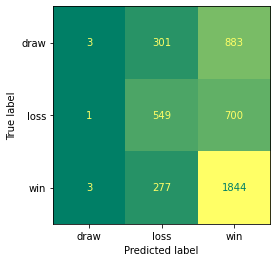

In [125]:

for i in opts:
    dfdf = pd.DataFrame(plot_confusion_matrix(rf,X_test,y_test, cmap='summer',colorbar=False).confusion_matrix)

In [126]:
dfdf


,0,1,2
0,3,301,883
1,1,549,700
2,3,277,1844


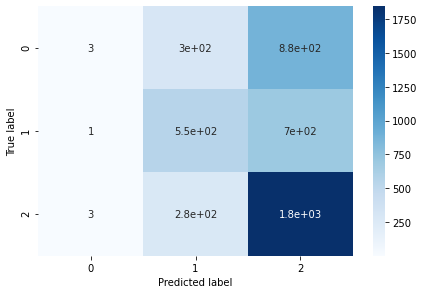

In [127]:
sns.heatmap(dfdf,annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# plt.savefig("../visualization/none_confusion.png")

In [168]:
import tensorflow as tf
import numpy as np

In [172]:
len(X_test_scaled)

4561

In [218]:
y_pred = model.predict_classes(X_test_scaled)
con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred).numpy()

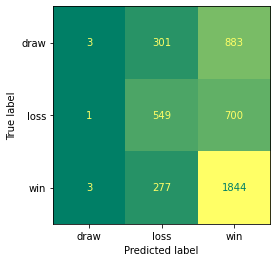

In [133]:


def getConfusion(dataframe):
    con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
    classes= ['draw','loss','win']
    con_mat_df = pd.DataFrame(con_mat_norm,
                         index = classes, 
                         columns = classes)
    figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


<ipython-input-133-bf079c865164>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  con_mat_norm = np.around(dataframe.astype('float') / dataframe.sum(axis=ax)[:, np.newaxis], decimals=2)
C:\Users\JoshWeidenaar\anaconda3\lib\site-packages\seaborn\matrix.py:204: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\JoshWeidenaar\anaconda3\lib\site-packages\seaborn\matrix.py:209: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


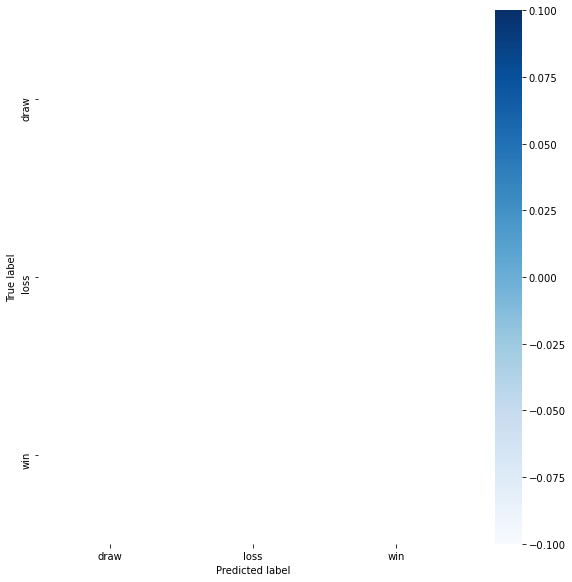

In [136]:
getConfusion(dfdf,ax=1)

In [219]:
con_mat

array([[   0,  315,  872],
       [   0,  551,  699],
       [   0,  289, 1835]])

In [143]:
con_mat.sum(axis=0)[:,np.newaxis]

array([[  75],
       [1158],
       [3328]])

In [212]:
np.around(con_mat.astype('float') / con_mat.sum(axis=0)[np.newaxis,:], decimals=2)

<ipython-input-212-e364ba01bd96>:1: RuntimeWarning: invalid value encountered in true_divide
  np.around(con_mat.astype('float') / con_mat.sum(axis=0)[np.newaxis,:], decimals=2)


array([[ nan, 0.27, 0.26],
       [ nan, 0.48, 0.21],
       [ nan, 0.25, 0.54]])

In [211]:
con_mat.astype('float')

array([[   0.,  315.,  872.],
       [   0.,  551.,  699.],
       [   0.,  289., 1835.]])

In [87]:
con_mat.sum()


NameError: name 'con_mat' is not defined

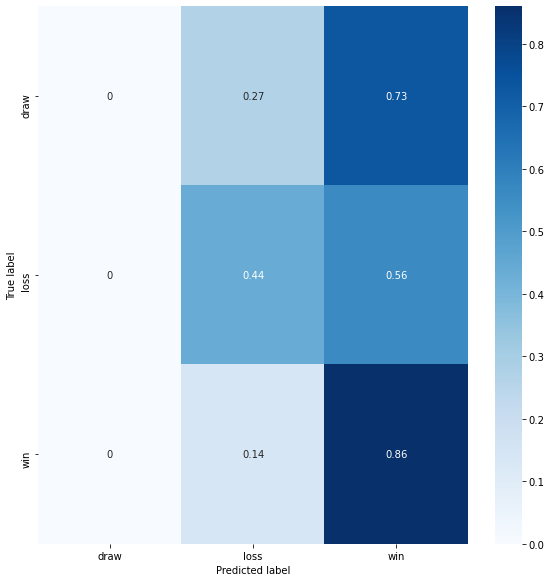

In [216]:
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
classes= ['draw','loss','win']
con_mat_df = pd.DataFrame(con_mat_norm,
                         index = classes, 
                         columns = classes)
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [100]:
import seaborn as sns

In [221]:
con_mat

array([[   0,  315,  872],
       [   0,  551,  699],
       [   0,  289, 1835]])

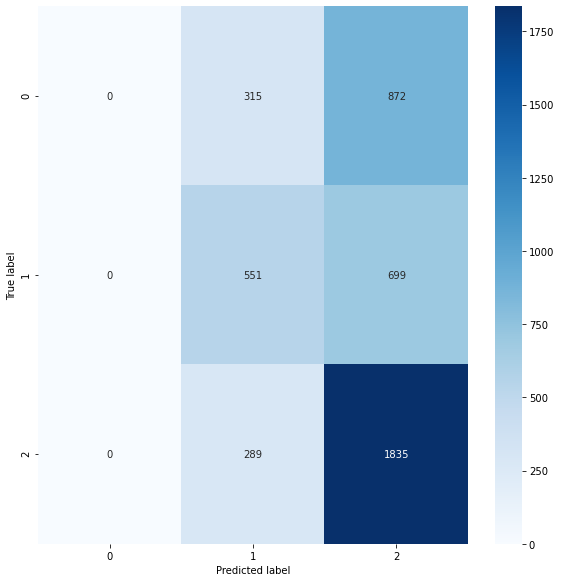

In [228]:
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat, annot=True,cmap=plt.cm.Blues,fmt='.4g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('../visualization/neural_none_confusion.png')


In [104]:
featmap = """B365H = Bet365 home win odds
B365D = Bet365 draw odds
B365A = Bet365 away win odds
BSH = Blue Square home win odds
BSD = Blue Square draw odds
BSA = Blue Square away win odds
BWH = Bet&Win home win odds
BWD = Bet&Win draw odds
BWA = Bet&Win away win odds
GBH = Gamebookers home win odds
GBD = Gamebookers draw odds
GBA = Gamebookers away win odds
IWH = Interwetten home win odds
IWD = Interwetten draw odds
IWA = Interwetten away win odds
LBH = Ladbrokes home win odds
LBD = Ladbrokes draw odds
LBA = Ladbrokes away win odds
PSH = Pinnacle Sports home win odds
PSD = Pinnacle Sports draw odds
PSA = Pinnacle Sports away win odds
SOH = Sporting Odds home win odds
SOD = Sporting Odds draw odds
SOA = Sporting Odds away win odds
SBH = Sportingbet home win odds
SBD = Sportingbet draw odds
SBA = Sportingbet away win odds
SJH = Stan James home win odds
SJD = Stan James draw odds
SJA = Stan James away win odds
SYH = Stanleybet home win odds
SYD = Stanleybet draw odds
SYA = Stanleybet away win odds
VCH = VC Bet home win odds
VCD = VC Bet draw odds
VCA = VC Bet away win odds
WHH = William Hill home win odds
WHD = William Hill draw odds
WHA = William Hill away win odds

Bb1X2 = Number of BetBrain bookmakers used to calculate match odds averages and maximums
BbMxH = Betbrain maximum home win odds
BbAvH = Betbrain average home win odds
BbMxD = Betbrain maximum draw odds
BbAvD = Betbrain average draw win odds
BbMxA = Betbrain maximum away win odds
BbAvA = Betbrain average away win odds"""

In [105]:
featmap = [i.split('\n') for i in featmap.split('=')]

In [106]:
featmap

[['B365H '],
 [' Bet365 home win odds', 'B365D '],
 [' Bet365 draw odds', 'B365A '],
 [' Bet365 away win odds', 'BSH '],
 [' Blue Square home win odds', 'BSD '],
 [' Blue Square draw odds', 'BSA '],
 [' Blue Square away win odds', 'BWH '],
 [' Bet&Win home win odds', 'BWD '],
 [' Bet&Win draw odds', 'BWA '],
 [' Bet&Win away win odds', 'GBH '],
 [' Gamebookers home win odds', 'GBD '],
 [' Gamebookers draw odds', 'GBA '],
 [' Gamebookers away win odds', 'IWH '],
 [' Interwetten home win odds', 'IWD '],
 [' Interwetten draw odds', 'IWA '],
 [' Interwetten away win odds', 'LBH '],
 [' Ladbrokes home win odds', 'LBD '],
 [' Ladbrokes draw odds', 'LBA '],
 [' Ladbrokes away win odds', 'PSH '],
 [' Pinnacle Sports home win odds', 'PSD '],
 [' Pinnacle Sports draw odds', 'PSA '],
 [' Pinnacle Sports away win odds', 'SOH '],
 [' Sporting Odds home win odds', 'SOD '],
 [' Sporting Odds draw odds', 'SOA '],
 [' Sporting Odds away win odds', 'SBH '],
 [' Sportingbet home win odds', 'SBD '],
 [' S

In [107]:
listie = []
for idx, i in enumerate(featmap,start=1):
    for idj, j in enumerate(i,start=1):
        listie.append(j)

In [108]:
listie = ['B365H ',
 ' Bet365 home win odds',
 'B365D ',
 ' Bet365 draw odds',
 'B365A ',
 ' Bet365 away win odds',
 'BSH ',
 ' Blue Square home win odds',
 'BSD ',
 ' Blue Square draw odds',
 'BSA ',
 ' Blue Square away win odds',
 'BWH ',
 ' Bet&Win home win odds',
 'BWD ',
 ' Bet&Win draw odds',
 'BWA ',
 ' Bet&Win away win odds',
 'GBH ',
 ' Gamebookers home win odds',
 'GBD ',
 ' Gamebookers draw odds',
 'GBA ',
 ' Gamebookers away win odds',
 'IWH ',
 ' Interwetten home win odds',
 'IWD ',
 ' Interwetten draw odds',
 'IWA ',
 ' Interwetten away win odds',
 'LBH ',
 ' Ladbrokes home win odds',
 'LBD ',
 ' Ladbrokes draw odds',
 'LBA ',
 ' Ladbrokes away win odds',
 'PSH ',
 ' Pinnacle Sports home win odds',
 'PSD ',
 ' Pinnacle Sports draw odds',
 'PSA ',
 ' Pinnacle Sports away win odds',
 'SOH ',
 ' Sporting Odds home win odds',
 'SOD ',
 ' Sporting Odds draw odds',
 'SOA ',
 ' Sporting Odds away win odds',
 'SBH ',
 ' Sportingbet home win odds',
 'SBD ',
 ' Sportingbet draw odds',
 'SBA ',
 ' Sportingbet away win odds',
 'SJH ',
 ' Stan James home win odds',
 'SJD ',
 ' Stan James draw odds',
 'SJA ',
 ' Stan James away win odds',
 'SYH ',
 ' Stanleybet home win odds',
 'SYD ',
 ' Stanleybet draw odds',
 'SYA ',
 ' Stanleybet away win odds',
 'VCH ',
 ' VC Bet home win odds',
 'VCD ',
 ' VC Bet draw odds',
 'VCA ',
 ' VC Bet away win odds',
 'WHH ',
 ' William Hill home win odds',
 'WHD ',
 ' William Hill draw odds',
 'WHA ',
 ' William Hill away win odds',
 'Bb1X2 ',
 ' Number of BetBrain bookmakers used to calculate match odds averages and maximums',
 'BbMxH ',
 ' Betbrain maximum home win odds',
 'BbAvH ',
 ' Betbrain average home win odds',
 'BbMxD ',
 ' Betbrain maximum draw odds',
 'BbAvD ',
 ' Betbrain average draw win odds',
 'BbMxA ',
 ' Betbrain maximum away win odds',
 'BbAvA ',
 ' Betbrain average away win odds']

In [109]:
dictie = {}
for idx, i in enumerate(listie,start=1):
    if i == '':
        
        key = listie[idx-1]
        value = listie[idx+1]
        continue 
#         print('here')
    elif (idx/2).is_integer() == True:
        value = listie[idx-1]
    elif idx/2 == .5:
        key = listie[0]
    elif (idx/2).is_integer() == False:
        key = listie[idx-1]

    dictie[key] = value

In [67]:
listie

['B365H ',
 ' Bet365 home win odds',
 'B365D ',
 ' Bet365 draw odds',
 'B365A ',
 ' Bet365 away win odds',
 'BSH ',
 ' Blue Square home win odds',
 'BSD ',
 ' Blue Square draw odds',
 'BSA ',
 ' Blue Square away win odds',
 'BWH ',
 ' Bet&Win home win odds',
 'BWD ',
 ' Bet&Win draw odds',
 'BWA ',
 ' Bet&Win away win odds',
 'GBH ',
 ' Gamebookers home win odds',
 'GBD ',
 ' Gamebookers draw odds',
 'GBA ',
 ' Gamebookers away win odds',
 'IWH ',
 ' Interwetten home win odds',
 'IWD ',
 ' Interwetten draw odds',
 'IWA ',
 ' Interwetten away win odds',
 'LBH ',
 ' Ladbrokes home win odds',
 'LBD ',
 ' Ladbrokes draw odds',
 'LBA ',
 ' Ladbrokes away win odds',
 'PSH ',
 ' Pinnacle Sports home win odds',
 'PSD ',
 ' Pinnacle Sports draw odds',
 'PSA ',
 ' Pinnacle Sports away win odds',
 'SOH ',
 ' Sporting Odds home win odds',
 'SOD ',
 ' Sporting Odds draw odds',
 'SOA ',
 ' Sporting Odds away win odds',
 'SBH ',
 ' Sportingbet home win odds',
 'SBD ',
 ' Sportingbet draw odds',
 'SBA

In [110]:
dictie1 = {}
for j, i in dictie.items():
    dictie1[j.strip()] = i.strip()

In [111]:
dictie1

{'B365H': 'Bet365 home win odds',
 'B365D': 'Bet365 draw odds',
 'B365A': 'Bet365 away win odds',
 'BSH': 'Blue Square home win odds',
 'BSD': 'Blue Square draw odds',
 'BSA': 'Blue Square away win odds',
 'BWH': 'Bet&Win home win odds',
 'BWD': 'Bet&Win draw odds',
 'BWA': 'Bet&Win away win odds',
 'GBH': 'Gamebookers home win odds',
 'GBD': 'Gamebookers draw odds',
 'GBA': 'Gamebookers away win odds',
 'IWH': 'Interwetten home win odds',
 'IWD': 'Interwetten draw odds',
 'IWA': 'Interwetten away win odds',
 'LBH': 'Ladbrokes home win odds',
 'LBD': 'Ladbrokes draw odds',
 'LBA': 'Ladbrokes away win odds',
 'PSH': 'Pinnacle Sports home win odds',
 'PSD': 'Pinnacle Sports draw odds',
 'PSA': 'Pinnacle Sports away win odds',
 'SOH': 'Sporting Odds home win odds',
 'SOD': 'Sporting Odds draw odds',
 'SOA': 'Sporting Odds away win odds',
 'SBH': 'Sportingbet home win odds',
 'SBD': 'Sportingbet draw odds',
 'SBA': 'Sportingbet away win odds',
 'SJH': 'Stan James home win odds',
 'SJD': 'S

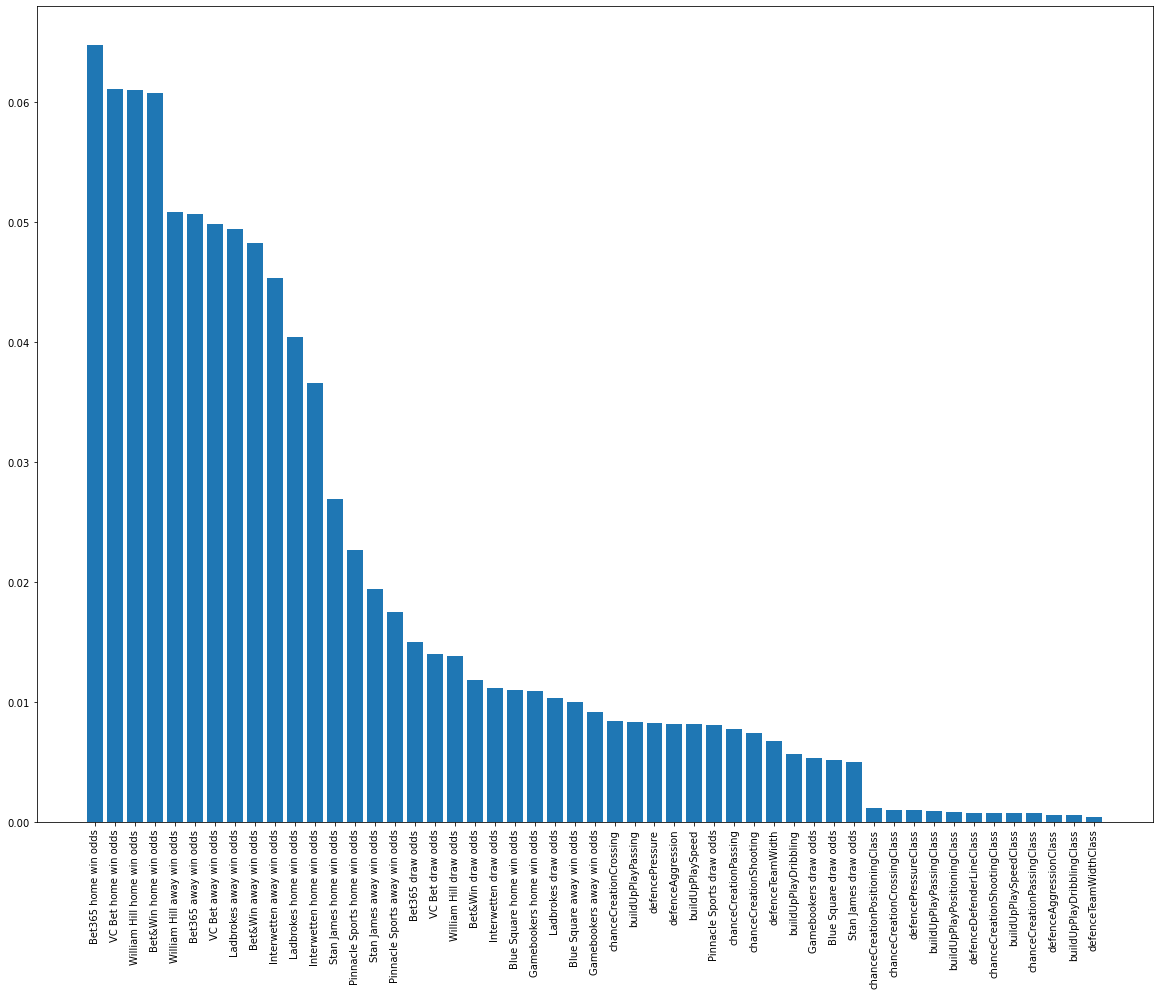

In [136]:
ax = plt.figure(figsize=(20,15))
plt.bar(listies,y)
plt.xticks(rotation=90)
plt.savefig('../visualization/FeatImp.png')

In [115]:
y = [i[0] for i in featureweight]

In [118]:
x = [i[1] for i in featureweight]

In [124]:
x = [i.split('_',1)[0] for i in x]

In [127]:
listies =[]
for i in x:
    try:
        listies.append(dictie1[i])
    except:
        listies.append(i)

In [128]:
listies

['Bet365 home win odds',
 'VC Bet home win odds',
 'William Hill home win odds',
 'Bet&Win home win odds',
 'William Hill away win odds',
 'Bet365 away win odds',
 'VC Bet away win odds',
 'Ladbrokes away win odds',
 'Bet&Win away win odds',
 'Interwetten away win odds',
 'Ladbrokes home win odds',
 'Interwetten home win odds',
 'Stan James home win odds',
 'Pinnacle Sports home win odds',
 'Stan James away win odds',
 'Pinnacle Sports away win odds',
 'Bet365 draw odds',
 'VC Bet draw odds',
 'William Hill draw odds',
 'Bet&Win draw odds',
 'Interwetten draw odds',
 'Blue Square home win odds',
 'Gamebookers home win odds',
 'Ladbrokes draw odds',
 'Blue Square away win odds',
 'Gamebookers away win odds',
 'chanceCreationCrossing',
 'buildUpPlayPassing',
 'defencePressure',
 'defenceAggression',
 'buildUpPlaySpeed',
 'Pinnacle Sports draw odds',
 'chanceCreationCrossing',
 'chanceCreationPassing',
 'defencePressure',
 'chanceCreationShooting',
 'buildUpPlaySpeed',
 'chanceCreationPas